# Alucar - Analisando as vendas

In [2]:
import pandas as pd

In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().value_counts()

mes    vendas
False  False     24
dtype: int64

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

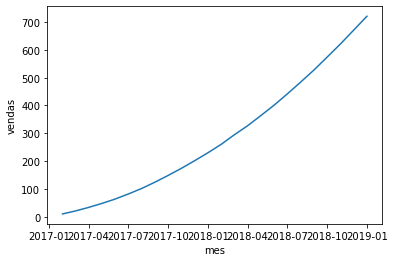

In [9]:
sns.lineplot(x='mes',y='vendas',data=alucar)

Text(0, 0.5, 'Vendas (un)')

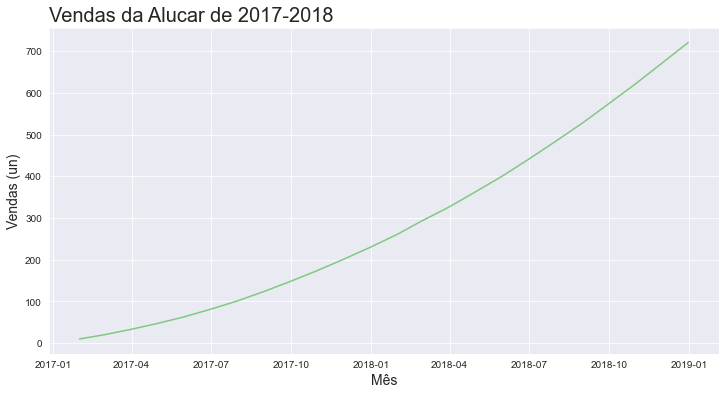

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017-2018',loc='left',fontsize=20)
ax.set_xlabel('Mês',fontsize=14)
ax.set_ylabel('Vendas (un)',fontsize=14)

In [11]:
alucar['aumento']=alucar['vendas'].diff()

In [12]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento (R$)')

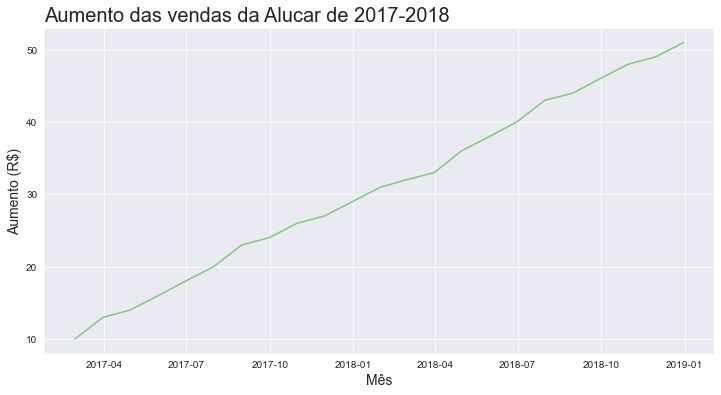

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017-2018',loc='left',fontsize=20)
ax.set_xlabel('Mês',fontsize=14)
ax.set_ylabel('Aumento (R$)',fontsize=14)

In [14]:
def plotar(dados,x,y,titulo,label_x,label_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dados)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_xlabel(label_x,fontsize=14)
    ax.set_ylabel(label_y,fontsize=14)
    ax =ax

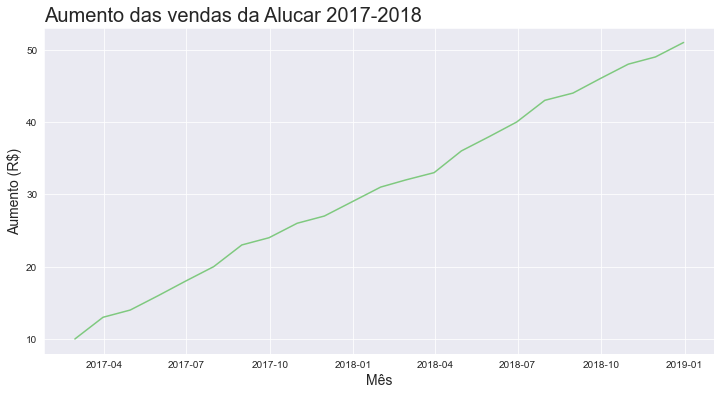

In [15]:
plotar(alucar,alucar.mes,alucar.aumento,'Aumento das vendas da Alucar 2017-2018','Mês','Aumento (R$)')

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()

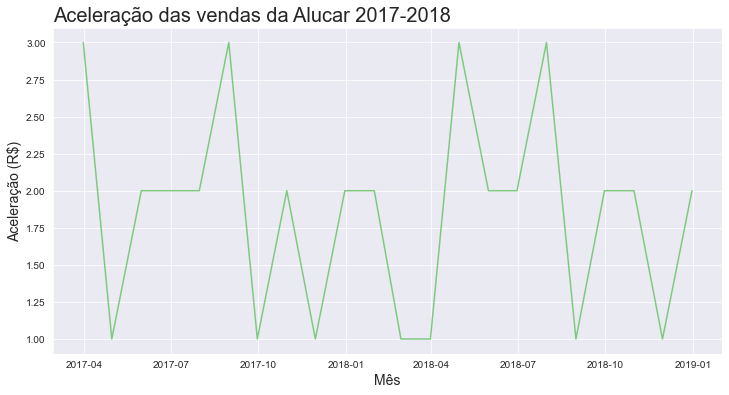

In [17]:
plotar(alucar,alucar.mes,alucar.aceleracao,'Aceleração das vendas da Alucar 2017-2018','Mês','Aceleração (R$)')

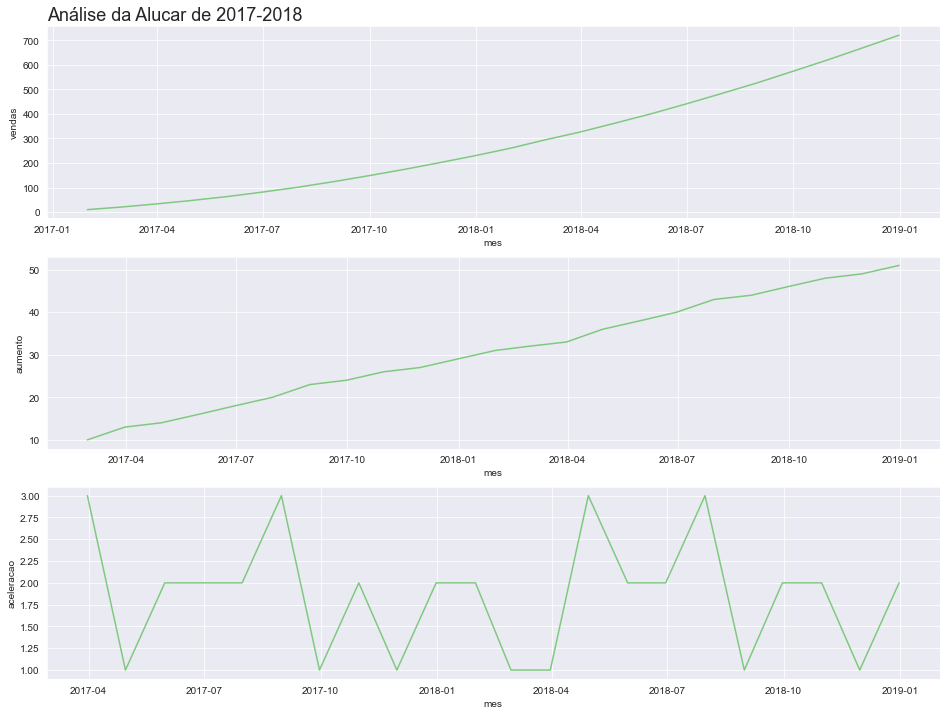

In [18]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise da Alucar de 2017-2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)
ax = ax

In [19]:
def plot_comparacao(x, y1, y2, y3, dados, titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dados)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dados)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dados)
    ax = ax

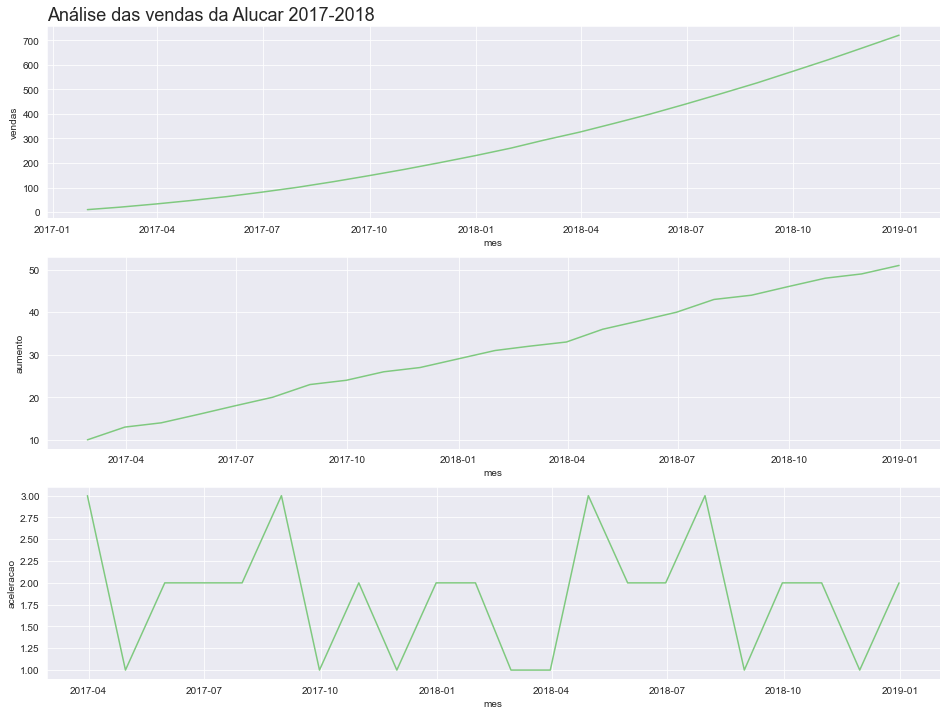

In [20]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar, 'Análise das vendas da Alucar 2017-2018')

In [21]:
from pandas.plotting import autocorrelation_plot

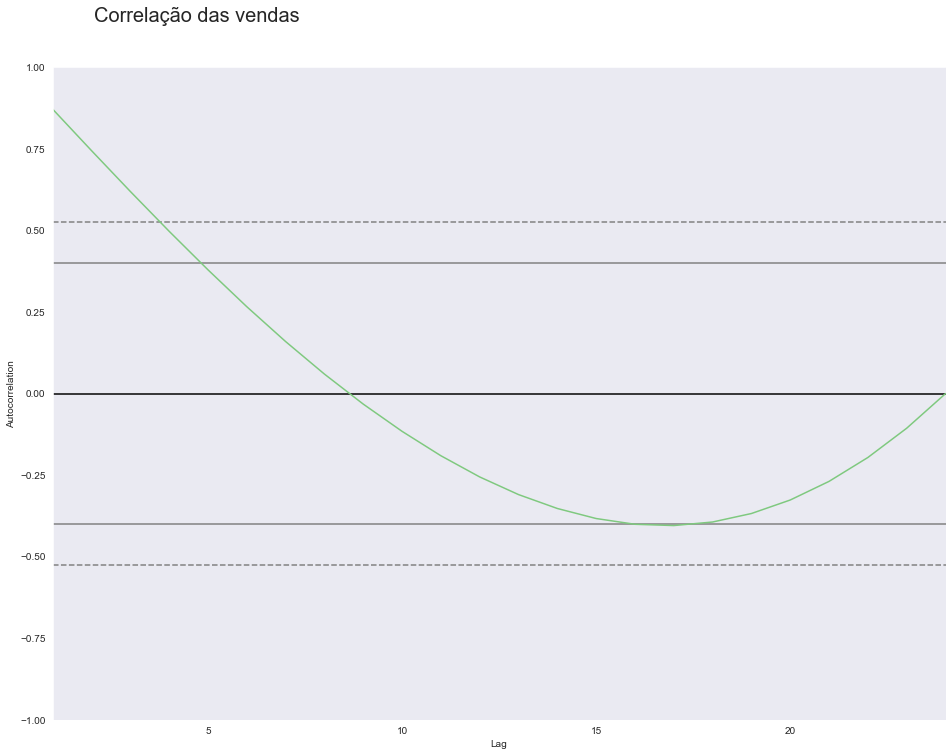

In [22]:
ax = plt.figure(figsize=(16,12))
ax.suptitle('Correlação das vendas', fontsize=20, x=0.25, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

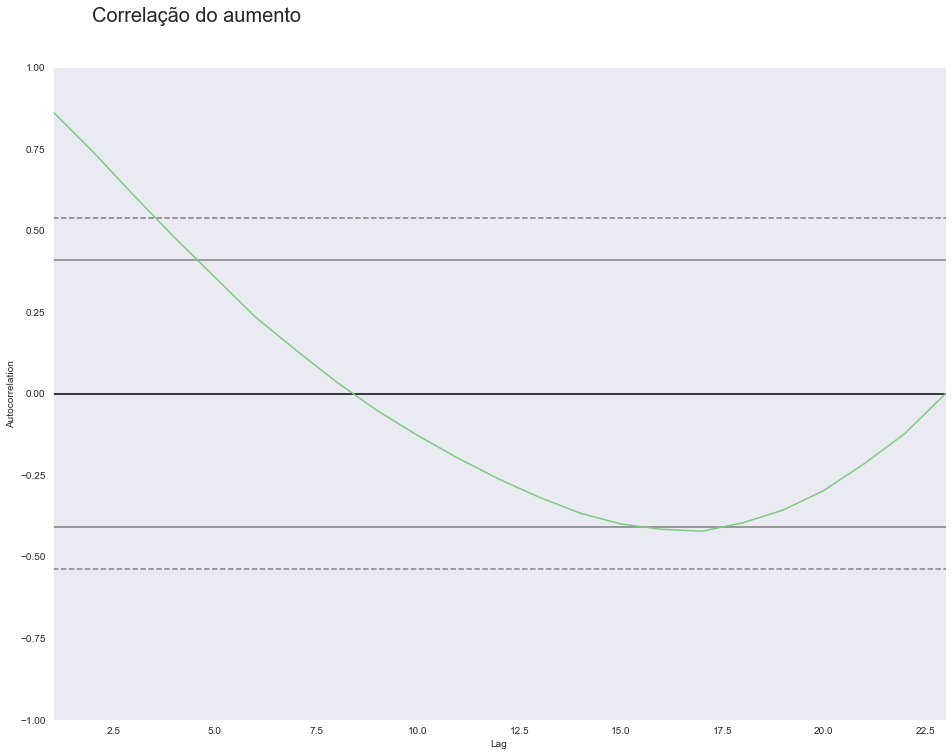

In [23]:
ax = plt.figure(figsize=(16,12))
ax.suptitle('Correlação do aumento', fontsize=20, x=0.25, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

# Alucar - Analisando assinantes das newsletters

In [24]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
print('quantidade de linhas e colunas: {}'.format(assinantes.shape))
print('quantidade de dados nulos: {}'.format(assinantes.isna().sum().sum()))

quantidade de linhas e colunas: (24, 2)
quantidade de dados nulos: 0


In [26]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [27]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


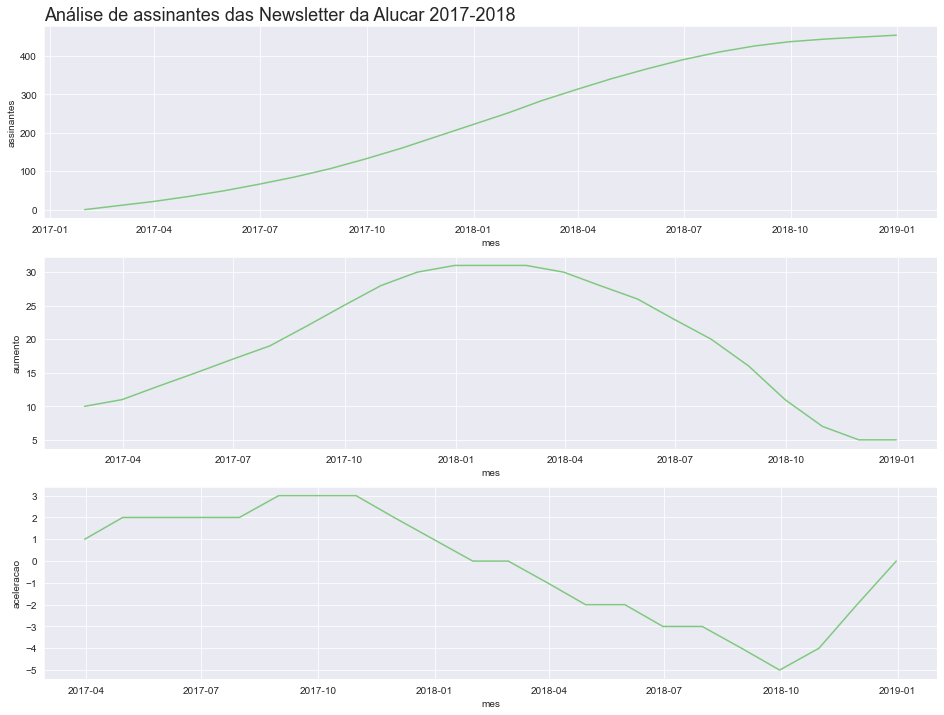

In [28]:
plot_comparacao('mes','assinantes','aumento','aceleracao', assinantes, 'Análise de assinantes das Newsletter da Alucar 2017-2018')

# Chocolura

In [29]:
choco = pd.read_csv('chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
choco.mes = pd.to_datetime(choco.mes)

In [31]:
print('quantidade de linhas e colunas: ',choco.shape)
print('quantidade de dados nulos: ', choco.isna().sum().sum())

quantidade de linhas e colunas:  (24, 2)
quantidade de dados nulos:  0


In [32]:
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


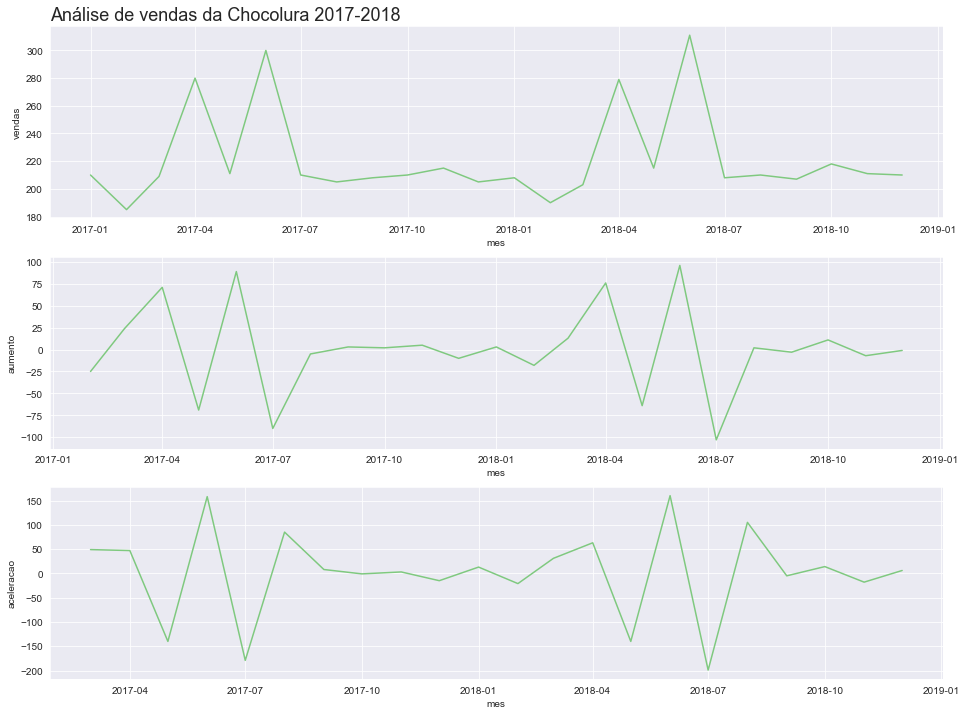

In [33]:
plot_comparacao('mes','vendas','aumento','aceleracao', choco, 'Análise de vendas da Chocolura 2017-2018')

# Chocolura - Vendas Diárias

In [34]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [35]:
print('Quantidade de linhas e colunas: ',vendas_por_dia.shape)
print('Quantidade de dados nulos: ',vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [36]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [37]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


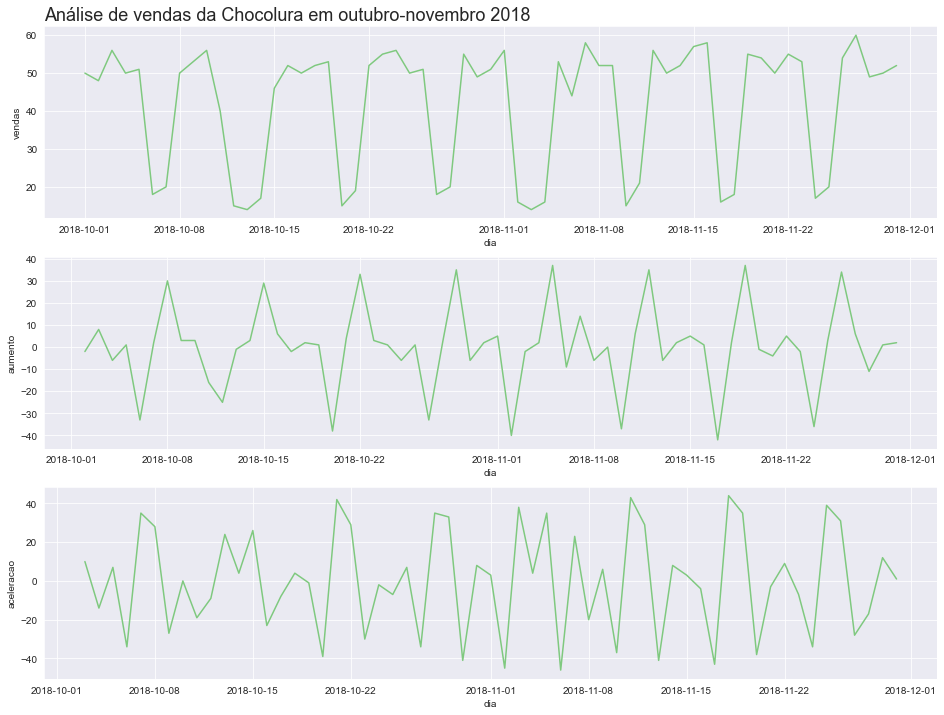

In [38]:
plot_comparacao('dia','vendas','aumento','aceleracao', vendas_por_dia, 'Análise de vendas da Chocolura em outubro-novembro 2018')

## Analisando a sazonalidade

In [39]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday

In [40]:
vendas_por_dia.dia_da_semana.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [41]:
dias_traduzidos = {6:'Domingo', 0:'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado'}

In [42]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

## Agrupando os dias

In [43]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()

<ipython-input-43-a97c16f425ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()


In [44]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação de vendas diárias

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

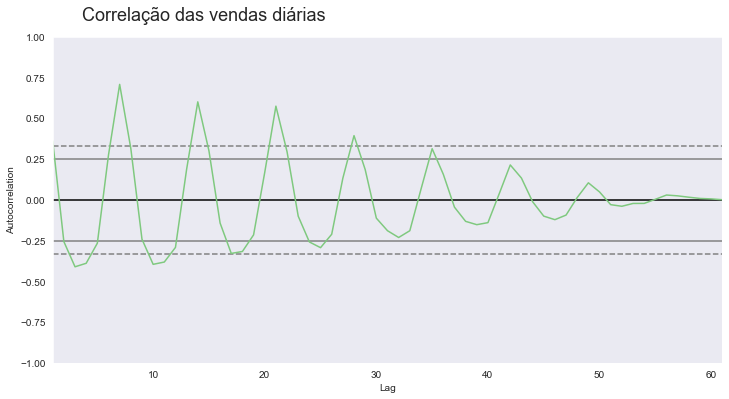

In [45]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

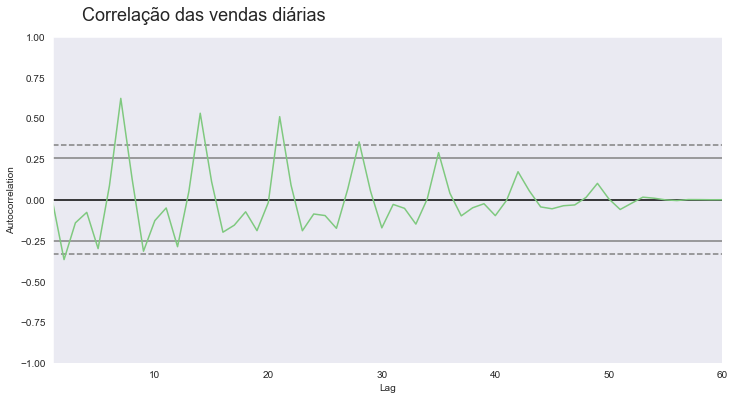

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

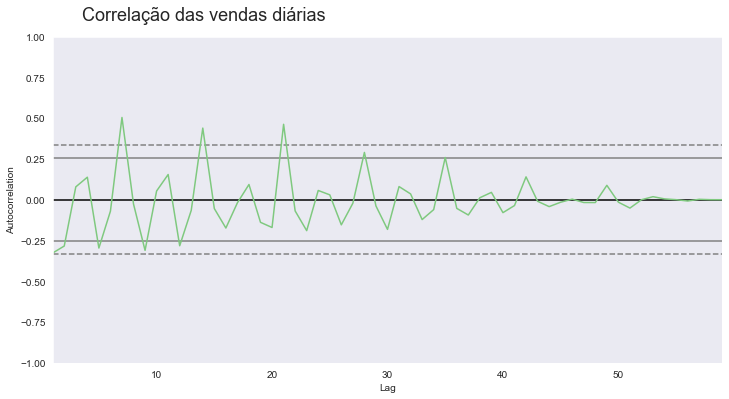

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])

# Cafelura - Análise de Vendas

In [48]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [49]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [50]:
print('Quantidade de linhas e colunas: ',cafelura.shape)
print('Quantidade de dados nulos: ',cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


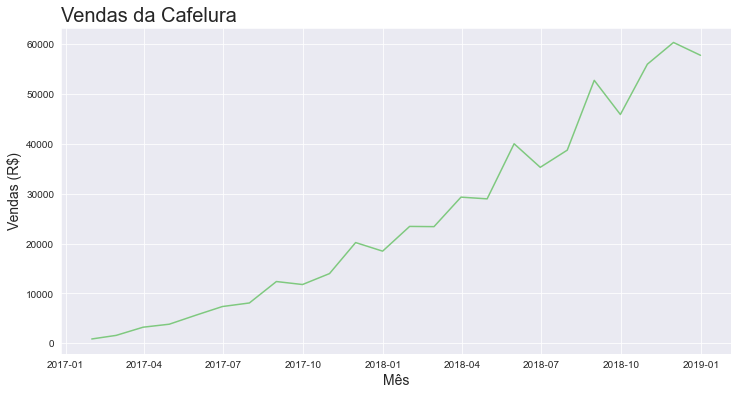

In [51]:
plotar(cafelura, 'mes', 'vendas', 'Vendas da Cafelura', 'Mês', 'Vendas (R$)')

In [52]:
quantidade_dias_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [53]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [54]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_dias_fds['quantidade_de_dias']

In [55]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


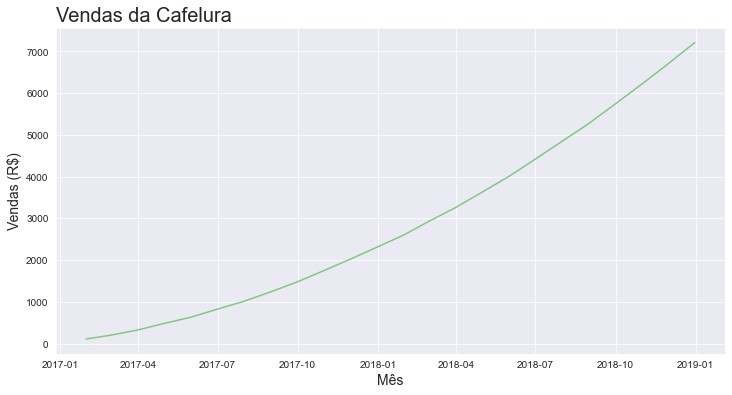

In [56]:
plotar(cafelura, 'mes', 'vendas_normalizadas', 'Vendas da Cafelura', 'Mês', 'Vendas (R$)')

<AxesSubplot:title={'center':'Vendas Normalizadas Cafelura 2017 e 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

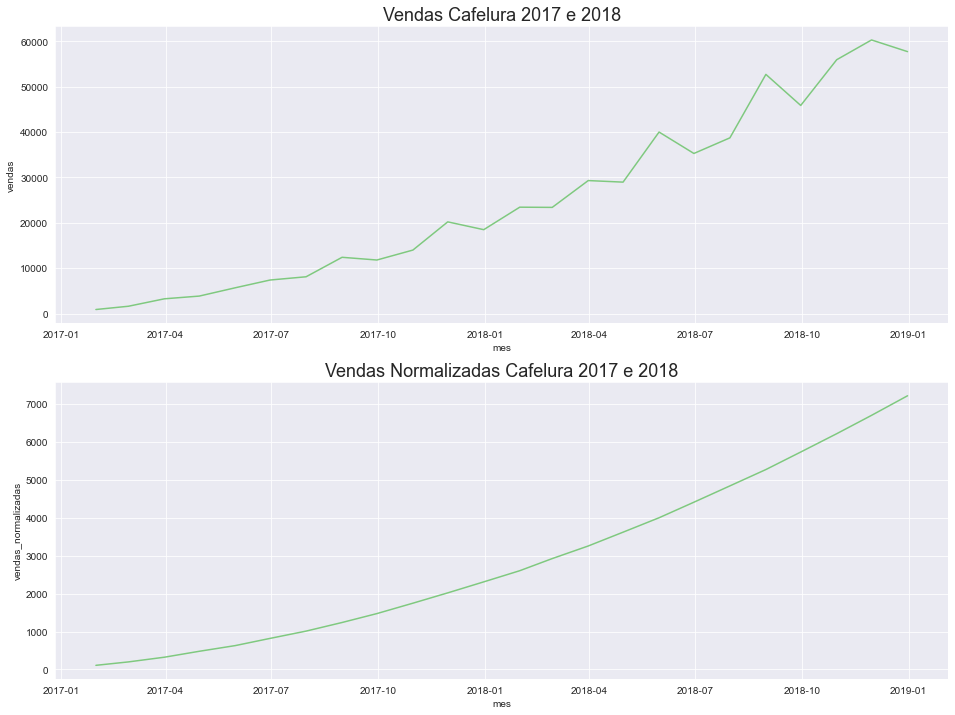

In [57]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)

# Statsmodels

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

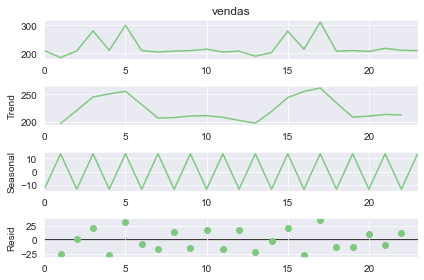

In [59]:
resultado = seasonal_decompose(choco['vendas'], period=2)
ax = resultado.plot()

In [60]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [61]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


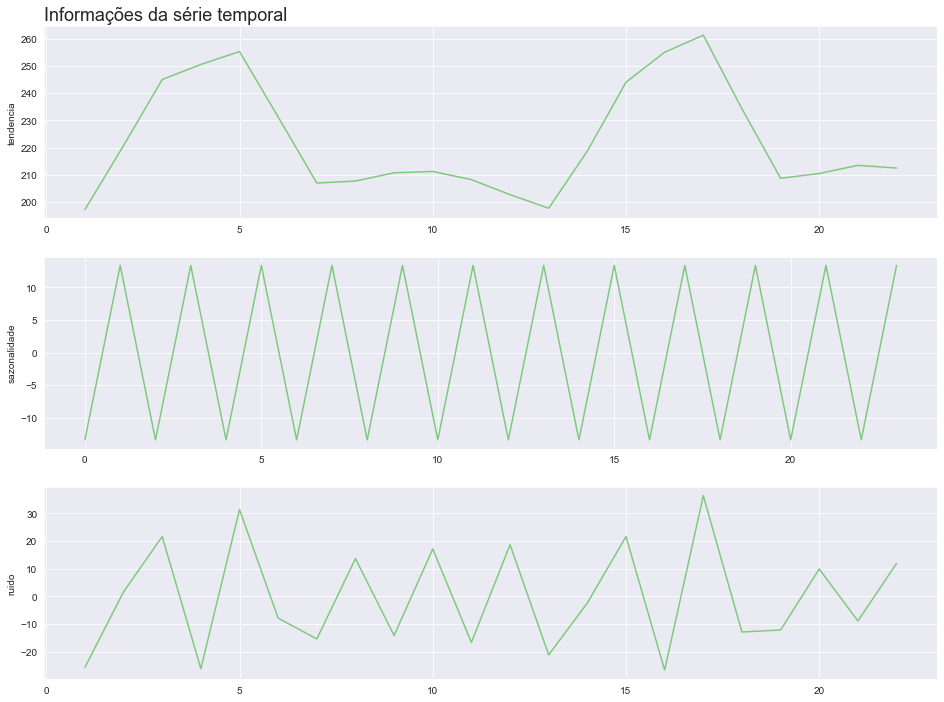

In [62]:
plot_comparacao(resultado.index,'tendencia','sazonalidade','ruido',resultado,'Informações da série temporal')

# Alucel - Análise de vendas

In [63]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [64]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [65]:
print('Quantidade de linha e colunas: ', alucel.shape)
print('Quantidade de dados nulos; ', alucel.isna().sum().sum())

Quantidade de linha e colunas:  (61, 2)
Quantidade de dados nulos;  0


In [66]:
alucel['aumento']=alucel['vendas'].diff()
alucel['aceleracao']=alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


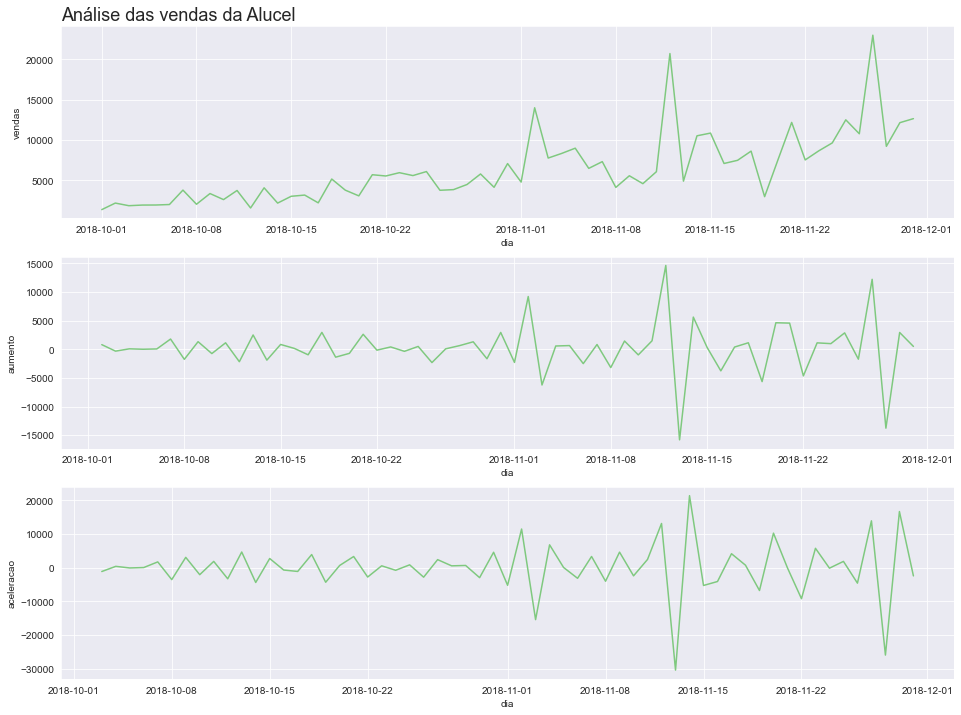

In [67]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Análise das vendas da Alucel')

**Média Móvel**

In [68]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

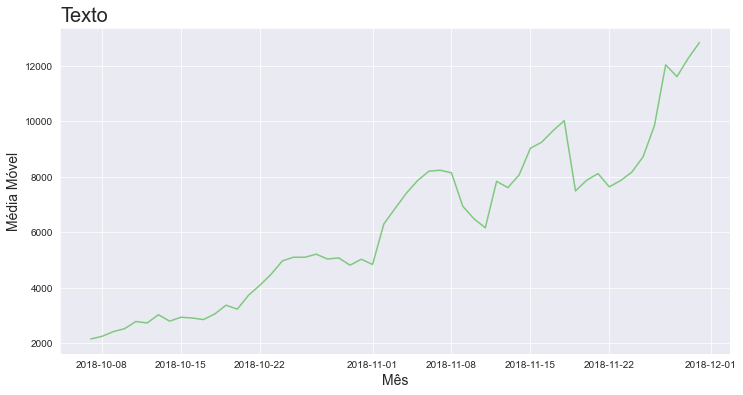

In [71]:
plotar(alucel,'dia','media_movel','Texto','Mês','Média Móvel')